# Знакомство со средой

In [1]:
from typing import *
import gymnasium as gym
import torch
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

In [2]:
env = gym.make("ALE/Assault-ram-v5", render_mode="rgb_array")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [3]:
env.action_space

Discrete(7)

In [4]:
env.observation_space

Box(0, 255, (128,), uint8)

In [5]:
env.reset()

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254,
          0,   0,   0,   6, 100, 100, 100,   0,   0,   0,   0,  88, 254,
          0,   0, 192,   0, 136, 252,   2,   2,   2,   2, 130, 130, 130,
          6, 188, 255,   0,  25,   0, 253,   0, 253, 128,  64, 128, 128,
         64, 128,   0,   0,   0,   0,   0,   0,   0,   0,  16,  16,   0,
        253,   0, 127, 115, 100,  64,  19,  24,   0, 253,   0,   0,   0,
          0,   0,   2, 130,   0, 254,   0, 254,   0, 254,   0, 254,   0,
        254, 144,  60,   0,   0,   0,   0,   0,  80, 254,   4, 207,  68,
          0,  10,   0,   4,   0,   0, 255, 248,   0,   0,  64,   0, 172,
          0,   0,   0,  15, 252, 157, 251,  64, 251, 112, 243], dtype=uint8),
 {'lives': 4, 'episode_frame_number': 0, 'frame_number': 0})

In [6]:
env.step(env.action_space.sample())

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254,
          0,   0,   0,   6, 100, 100, 100,   0, 198,   0,   0,   0, 253,
          0,   0, 192,   0, 136, 252,   2,  66, 194,  66, 194,  51, 194,
          6, 188, 255,   0,  25,   0, 253,   0, 253, 128,  64, 128, 128,
         64, 128,   0,   0,   0,   0,   0,   0,  28,  28,  17,  17,   0,
        253,   0, 127,  51,  36,  64,  19,  24,   0, 253,   0,   0,   0,
          0,   0,  66, 194,   0, 254,   0, 254,   0, 254,   0, 254,   0,
        254, 144,  60,   0,   0,   0,   0,   0,  80, 254,   4,  50,  72,
          0,  10,   0,   8,   0,   0, 255, 248,   0,   0,  64,   0, 154,
          0,   0,   0, 248, 251,  15, 252,  64, 251,   0, 245], dtype=uint8),
 0.0,
 False,
 False,
 {'lives': 4, 'episode_frame_number': 4, 'frame_number': 4})

/home/andrew/Projects/2024_1/machine_learning/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


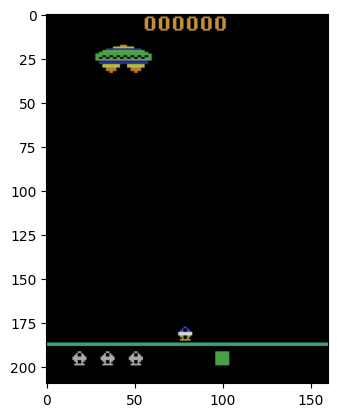

In [7]:
plt.imshow(env.render())

In [8]:
env.close()

In [8]:
env = gym.make("ALE/Assault-ram-v5")

In [10]:
def eps_greedy_policy(n_action: int, eps: float, Q: Any) -> float:
    probabilities = torch.ones(n_action) * eps / n_action
    best_action = torch.argmax(Q).item()
    probabilities[best_action] += 1 - eps
    return torch.multinomial(torch.ones(len(probabilities)), 1).item()

In [11]:
env.reset()

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254,
          0,   0,   0,   6, 100, 100, 100,   0,   0,   0,   0,  88, 254,
          0,   0, 192,   0, 136, 252,   2,   2,   2,   2, 130, 130, 130,
          6, 188, 255,   0,  25,   0, 253,   0, 253, 128,  64, 128, 128,
         64, 128,   0,   0,   0,   0,   0,   0,   0,   0,  16,  16,   0,
        253,   0, 127, 115, 100,  64,  19,  24,   0, 253,   0,   0,   0,
          0,   0,   2, 130,   0, 254,   0, 254,   0, 254,   0, 254,   0,
        254, 144,  60,   0,   0,   0,   0,   0,  80, 254,   4, 207,  68,
          0,  10,   0,   4,   0,   0, 255, 248,   0,   0,  64,   0, 172,
          0,   0,   0,  15, 252, 157, 251,  64, 251, 112, 243], dtype=uint8),
 {'lives': 4, 'episode_frame_number': 0, 'frame_number': 0})

In [22]:
def step_print(string: str, iteration: int, step: int) -> None:
    if iteration % step == 0:
        print(string)

In [13]:
n_episodes = 100
n_action = 7

action_count = [0 for _ in range(n_action)]
action_total_reward = [0 for _ in range(n_action)]
action_avg_reward: list[list[float | None]] = [[] for _ in range(n_action)]

path: list[list[tuple[NDArray[np.uint8], int]]] = list() # state, action
rewards: list[float] = list()

eps: Final[float] = 0.2
Q = torch.zeros(n_action)

for episode in range(n_episodes):
    path.append([])
    env.reset()
    total_reward = 0.
    while True:
        action = eps_greedy_policy(n_action, eps, Q)
        state, reward, is_terminated, is_truncated, _ = env.step(action)

        action_count[action] += 1
        action_total_reward[action] += reward
        total_reward += reward

        Q[action] = action_total_reward[action] / action_count[action]
        for i in range(n_action):
            if action_count[i] != 0:
                action_avg_reward[i].append(action_total_reward[i] / action_count[i])
            else:
                action_avg_reward[i].append(None)
        path[-1].append([state, action])
        if is_terminated or is_truncated:
            break
    step_print(episode, episode, 10)
    rewards.append(total_reward)

0
10
20
30
40
50
60
70
80
90


In [14]:
Q

tensor([0.4707, 0.4310, 0.3700, 0.4219, 0.3938, 0.4076, 0.4343])

In [15]:
action_count, action_total_reward

([8165, 8234, 8117, 8064, 8212, 8295, 8027],
 [3843.0, 3549.0, 3003.0, 3402.0, 3234.0, 3381.0, 3486.0])

In [ ]:
path

In [17]:
rewards

[315.0,
 210.0,
 231.0,
 378.0,
 189.0,
 294.0,
 315.0,
 189.0,
 273.0,
 126.0,
 189.0,
 189.0,
 189.0,
 231.0,
 231.0,
 189.0,
 231.0,
 168.0,
 210.0,
 126.0,
 378.0,
 231.0,
 105.0,
 189.0,
 168.0,
 273.0,
 399.0,
 189.0,
 189.0,
 294.0,
 315.0,
 315.0,
 189.0,
 315.0,
 231.0,
 294.0,
 189.0,
 189.0,
 189.0,
 336.0,
 315.0,
 336.0,
 336.0,
 147.0,
 231.0,
 336.0,
 189.0,
 189.0,
 189.0,
 210.0,
 147.0,
 189.0,
 231.0,
 294.0,
 273.0,
 294.0,
 231.0,
 336.0,
 105.0,
 357.0,
 168.0,
 189.0,
 147.0,
 189.0,
 231.0,
 231.0,
 189.0,
 273.0,
 315.0,
 168.0,
 189.0,
 189.0,
 189.0,
 273.0,
 294.0,
 189.0,
 189.0,
 378.0,
 168.0,
 294.0,
 147.0,
 252.0,
 189.0,
 252.0,
 168.0,
 399.0,
 399.0,
 231.0,
 210.0,
 315.0,
 252.0,
 189.0,
 273.0,
 273.0,
 357.0,
 168.0,
 189.0,
 189.0,
 336.0,
 273.0]

In [18]:
rewards_mean = np.mean(rewards)
f"Точечная оценка: {rewards_mean}"

'Точечная оценка: 238.98'

In [19]:
unbiased_variance = np.sqrt(sum(np.power(np.array(rewards) - np.mean(rewards), 2)) / (len(rewards) - 1))
unbiased_variance

71.31010383592853

In [20]:
t = 0.99
t_y = 2.627
delta = t_y * unbiased_variance / np.sqrt(len(rewards))

In [21]:
f"Интервальная оценка: ({rewards_mean - delta}, {rewards_mean + delta})"

'Интервальная оценка: (220.24683572230157, 257.7131642776984)'

# Модель 1

In [235]:
import torch.nn as nn
import torch.nn.functional as F

In [236]:
class ActorCriticModel(nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: List[int], device: str = "cpu") -> None:
        super(ActorCriticModel, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden[0], device=device)
        self.fc2 = nn.Linear(n_hidden[0], n_hidden[1], device=device)
        self.action = nn.Linear(n_hidden[1], n_output, device=device)
        self.value = nn.Linear(n_hidden[1], 1, device=device)
        self.device = device
    
    def forward(self, x: int) -> tuple[torch.Tensor, torch.Tensor]:
        x = torch.Tensor(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        action_probs = F.softmax(self.action(x), dim=-1).to(self.device)
        state_value = self.value(x)
        return action_probs, state_value

In [247]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.001) -> None:
        self.device = "cuda:0" if torch.cuda.is_available() else "cpu"
        self.model = ActorCriticModel(n_state, n_actions, n_hidden, self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.995)
    
    def predict(self, s: Any) -> Any:
        return self.model(torch.tensor(s, dtype=torch.float, device=self.device))
    
    def update(self, returns: torch.Tensor, log_probs, state_values) -> None:
        returns = returns.to(self.device)
        loss = 0
        for log_prob, value, Gt in zip(log_probs, state_values, returns):
            advantage = (Gt - value.item()).to(self.device)
            # print((-log_prob).get_device(), advantage.get_device())
            
            policy_loss = -log_prob * advantage
            value_loss = F.smooth_l1_loss(value, Gt)
            loss += policy_loss + value_loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        action_probs, state_value = self.predict(s)
        state_value = state_value.to(self.device)
        action = torch.multinomial(action_probs, 1).item()
        log_prob = torch.log(action_probs[action]).to(self.device)
        return action, log_prob, state_value

    def save(self, filename: str) -> None:
        torch.save(self, filename)
    
    @classmethod
    def load(cls, filename: str) -> Self:
        return torch.load(filename)

In [248]:
def actor_critic(env: gym.Env, estimator: PolicyNetwork, n_episode: int, gamma: float = 1.0) -> list[float]:
    total_reward_episode = list()
    success_score = 200
    for episode in range(n_episode):
        total_reward_episode.append(0)
        log_probs = []
        rewards = []
        state_values = []

        state = env.reset(seed=0)[0]
        while True:
            #one_hot_state = [0] * 48
            #one_hot_state[state] = 1
            # print(state)
            action, log_prob, state_value = estimator.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            state_values.append(state_value)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0
                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    returns.append(Gt)
                    pw += 1
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)
                estimator.update(returns, log_probs, state_values)
                if total_reward_episode[episode] >= success_score:
                    estimator.scheduler.step()
                break

            state = next_state
        step_print(f"{episode}: {total_reward_episode[episode]}, mean: {round(np.mean(total_reward_episode), 2)}, eliminated enemies: {int(total_reward_episode[episode] // 21)}, success score: {success_score}, lr: {estimator.optimizer.param_groups[0]['lr']}", episode, 1)
    return total_reward_episode

In [257]:
estimator = PolicyNetwork(env.observation_space.shape[0], env.action_space.n, [256, 32], 0.000004)

In [268]:
n_episodes = 1000
gamma = .9

In [259]:
rewards: list[float] = list()

In [269]:
rewards.extend(actor_critic(env, estimator, n_episodes, gamma))

0: 672.0, mean: 672.0, eliminated enemies: 32, success score: 200, lr: 6.387156305325594e-07
1: 399.0, mean: 535.5, eliminated enemies: 19, success score: 200, lr: 6.387156305325594e-07
2: 189.0, mean: 420.0, eliminated enemies: 9, success score: 200, lr: 6.387156305325594e-07
3: 357.0, mean: 404.25, eliminated enemies: 17, success score: 200, lr: 6.387156305325594e-07
4: 462.0, mean: 415.8, eliminated enemies: 22, success score: 200, lr: 6.387156305325594e-07
5: 588.0, mean: 444.5, eliminated enemies: 28, success score: 200, lr: 6.387156305325594e-07
6: 546.0, mean: 459.0, eliminated enemies: 26, success score: 200, lr: 6.387156305325594e-07
7: 546.0, mean: 469.88, eliminated enemies: 26, success score: 200, lr: 6.387156305325594e-07
8: 378.0, mean: 459.67, eliminated enemies: 18, success score: 200, lr: 6.387156305325594e-07
9: 399.0, mean: 453.6, eliminated enemies: 19, success score: 200, lr: 6.387156305325594e-07
10: 588.0, mean: 465.82, eliminated enemies: 28, success score: 200,

KeyboardInterrupt: 

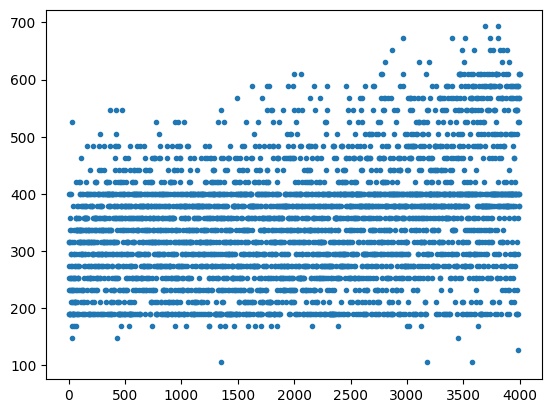

In [270]:
plt.plot(rewards, ".")

In [272]:
env = gym.make("ALE/Assault-ram-v5", render_mode="human")
env.metadata["render_fps"] = 30

score_history: list[float] = [0]
state = env.reset()[0]

while True:
    # print(state)
    action, _, _ = estimator.get_action(state)
    next_state, reward, is_done, is_truncated, _ = env.step(action)
    score_history.append(score_history[-1] + reward)

    if is_truncated or is_done:
        break

    state = next_state
    env.render()

# plt.plot(score_history, ".")
env.close()

KeyboardInterrupt: 

In [ ]:
# estimator.save("actor.pt")